- mnist를 DNN으로 구현 : https://sdc-james.gitbook.io/onebook/4.-and/5.1./5.1.3.-mnist-dataset
- 콜백함수

## 데이터셋을 라이브러리 에서 가져올 예정. 파일에서도 가져옴

In [47]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input
from matplotlib import pyplot as plt
np.random.seed(4)

In [2]:
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [3]:
print(data[0].shape)
print(data[0,0])
print(data[0,1:].reshape(28,28))

(785,)
5.0
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195. 

In [4]:
for row in data[0,1:].reshape(28,-1):
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

5.0

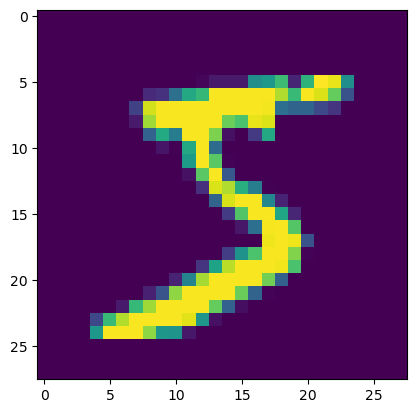

In [5]:
plt.imshow(data[0,1:].reshape(28,-1))
data[0,0]

위의 과정보다 더 많은 데이터를 라이브러리에서 가져옴

## 1. 데이터생성 & 전처리

In [2]:
((X_train, Y_train),(X_test, Y_test)) = mnist.load_data()
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
for row in X_train[1]:
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

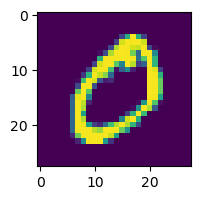

In [8]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[1])
plt.show()

In [9]:
# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋 (만개) 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

In [10]:
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [11]:
# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
X_train = X_train.reshape(50000, 784).astype('float32')/255.0
X_val = X_val.reshape(-1, 784).astype('float32')/255.0
X_test = X_test.reshape(-1, 784).astype('float32')/255.0
X_train.shape, X_val.shape, X_test.shape

((50000, 784), (10000, 784), (10000, 784))

In [12]:
# 훈련셋(5만)과 검증셋(만) -> 700개, 300개만 random 으로 choice
train_idxs = np.random.choice(50000, 700)
val_idxs = np.random.choice(10000, 300)

X_train = X_train[train_idxs]
Y_train = Y_train[train_idxs]
X_val = X_val[val_idxs]
Y_val = Y_val[val_idxs]

9


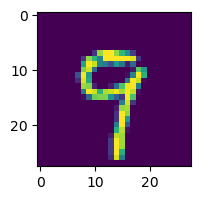

In [16]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[5].reshape(-1,28))
print(Y_train[5])

In [17]:
# 종속 변수 전처리 : 원핫인코딩 (to_categorical(넘파이배열) pd.get_dummies(데이터프레임을 반환))
print('원핫인코딩 전 shape :', Y_train.shape, Y_val.shape, Y_test.shape)
# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)
print('원핫인코딩 후 shape :', Y_train.shape, Y_val.shape, Y_test.shape)

원핫인코딩 전 shape : (700,) (300,) (10000,)
원핫인코딩 후 shape : (700, 10) (300, 10) (10000, 10)


In [20]:
print(Y_train[0])
print(Y_train[0].argmax())

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
8


## 2. 모델구성하기

In [21]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2,
               activation='relu'))
model.add(Dense(units=10,
               activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


## 3. 모델 학습과정 설정

In [23]:
model.compile(loss='categorical_crossentropy',
             optimizer='nadam',
             metrics=['accuracy'])

## 4. 모델 학습

In [24]:
hist = model.fit(X_train, Y_train,
                epochs=1200,
                batch_size=100,
                validation_data=(X_val, Y_val))

Epoch 1/1200
7/7 [==============================] - 2s 44ms/step - loss: 2.2810 - accuracy: 0.1657 - val_loss: 2.2749 - val_accuracy: 0.1800
Epoch 2/1200
7/7 [==============================] - 0s 13ms/step - loss: 2.2437 - accuracy: 0.1857 - val_loss: 2.2396 - val_accuracy: 0.1933
Epoch 3/1200
7/7 [==============================] - 0s 13ms/step - loss: 2.2067 - accuracy: 0.1929 - val_loss: 2.2051 - val_accuracy: 0.1967
Epoch 4/1200
7/7 [==============================] - 0s 12ms/step - loss: 2.1733 - accuracy: 0.1871 - val_loss: 2.1747 - val_accuracy: 0.1933
Epoch 5/1200
7/7 [==============================] - 0s 13ms/step - loss: 2.1457 - accuracy: 0.1843 - val_loss: 2.1498 - val_accuracy: 0.1933
Epoch 6/1200
7/7 [==============================] - 0s 13ms/step - loss: 2.1212 - accuracy: 0.1800 - val_loss: 2.1268 - val_accuracy: 0.1933
Epoch 7/1200
7/7 [==============================] - 0s 11ms/step - loss: 2.0992 - accuracy: 0.2057 - val_loss: 2.1072 - val_accuracy: 0.2167
Epoch 8/1200


Epoch 59/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.6500 - accuracy: 0.3700 - val_loss: 1.7385 - val_accuracy: 0.3267
Epoch 60/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.6433 - accuracy: 0.3700 - val_loss: 1.7338 - val_accuracy: 0.3267
Epoch 61/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.6374 - accuracy: 0.3714 - val_loss: 1.7287 - val_accuracy: 0.3267
Epoch 62/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.6307 - accuracy: 0.3829 - val_loss: 1.7249 - val_accuracy: 0.3300
Epoch 63/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.6252 - accuracy: 0.3900 - val_loss: 1.7194 - val_accuracy: 0.3300
Epoch 64/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.6187 - accuracy: 0.3886 - val_loss: 1.7142 - val_accuracy: 0.3300
Epoch 65/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.6130 - accuracy: 0.3886 - val_loss: 1.7084 - val_accuracy: 0.3400
Epoch 66

7/7 [==============================] - 0s 10ms/step - loss: 1.1641 - accuracy: 0.5871 - val_loss: 1.4034 - val_accuracy: 0.4967
Epoch 174/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.1614 - accuracy: 0.5914 - val_loss: 1.4008 - val_accuracy: 0.4900
Epoch 175/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.1590 - accuracy: 0.5943 - val_loss: 1.4013 - val_accuracy: 0.4867
Epoch 176/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.1570 - accuracy: 0.5914 - val_loss: 1.3991 - val_accuracy: 0.5033
Epoch 177/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.1542 - accuracy: 0.5929 - val_loss: 1.3991 - val_accuracy: 0.4967
Epoch 178/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.1518 - accuracy: 0.5957 - val_loss: 1.3978 - val_accuracy: 0.5000
Epoch 179/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.1487 - accuracy: 0.6071 - val_loss: 1.3986 - val_accuracy: 0.4967
Epoch 180/1200

7/7 [==============================] - 0s 10ms/step - loss: 0.9675 - accuracy: 0.6971 - val_loss: 1.3892 - val_accuracy: 0.5433
Epoch 288/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.9663 - accuracy: 0.7014 - val_loss: 1.3886 - val_accuracy: 0.5467
Epoch 289/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.9644 - accuracy: 0.7000 - val_loss: 1.3911 - val_accuracy: 0.5567
Epoch 290/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.9632 - accuracy: 0.6986 - val_loss: 1.3928 - val_accuracy: 0.5500
Epoch 291/1200
7/7 [==============================] - 0s 12ms/step - loss: 0.9619 - accuracy: 0.6986 - val_loss: 1.3916 - val_accuracy: 0.5500
Epoch 292/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.9601 - accuracy: 0.7014 - val_loss: 1.3900 - val_accuracy: 0.5500
Epoch 293/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.9586 - accuracy: 0.7014 - val_loss: 1.3885 - val_accuracy: 0.5433
Epoch 294/1200

7/7 [==============================] - 0s 9ms/step - loss: 0.8299 - accuracy: 0.7443 - val_loss: 1.4374 - val_accuracy: 0.5533
Epoch 402/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.8283 - accuracy: 0.7471 - val_loss: 1.4414 - val_accuracy: 0.5533
Epoch 403/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.8283 - accuracy: 0.7429 - val_loss: 1.4372 - val_accuracy: 0.5567
Epoch 404/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.8267 - accuracy: 0.7443 - val_loss: 1.4411 - val_accuracy: 0.5533
Epoch 405/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.8256 - accuracy: 0.7443 - val_loss: 1.4446 - val_accuracy: 0.5533
Epoch 406/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.8249 - accuracy: 0.7443 - val_loss: 1.4451 - val_accuracy: 0.5567
Epoch 407/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.8238 - accuracy: 0.7457 - val_loss: 1.4455 - val_accuracy: 0.5533
Epoch 408/1200


7/7 [==============================] - 0s 10ms/step - loss: 0.7366 - accuracy: 0.7786 - val_loss: 1.5468 - val_accuracy: 0.5400
Epoch 516/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.7360 - accuracy: 0.7771 - val_loss: 1.5479 - val_accuracy: 0.5400
Epoch 517/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.7350 - accuracy: 0.7771 - val_loss: 1.5486 - val_accuracy: 0.5400
Epoch 518/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.7351 - accuracy: 0.7814 - val_loss: 1.5507 - val_accuracy: 0.5400
Epoch 519/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.7343 - accuracy: 0.7786 - val_loss: 1.5525 - val_accuracy: 0.5400
Epoch 520/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.7339 - accuracy: 0.7757 - val_loss: 1.5509 - val_accuracy: 0.5367
Epoch 521/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.7330 - accuracy: 0.7814 - val_loss: 1.5560 - val_accuracy: 0.5367
Epoch 522/1200

7/7 [==============================] - 0s 10ms/step - loss: 0.6695 - accuracy: 0.7929 - val_loss: 1.6954 - val_accuracy: 0.5400
Epoch 630/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.6692 - accuracy: 0.7886 - val_loss: 1.6990 - val_accuracy: 0.5400
Epoch 631/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.6687 - accuracy: 0.7900 - val_loss: 1.6964 - val_accuracy: 0.5400
Epoch 632/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.6679 - accuracy: 0.7986 - val_loss: 1.7022 - val_accuracy: 0.5400
Epoch 633/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.6674 - accuracy: 0.7971 - val_loss: 1.7013 - val_accuracy: 0.5367
Epoch 634/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.6670 - accuracy: 0.7971 - val_loss: 1.7034 - val_accuracy: 0.5400
Epoch 635/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.6664 - accuracy: 0.8000 - val_loss: 1.7044 - val_accuracy: 0.5400
Epoch 636/1200

7/7 [==============================] - 0s 8ms/step - loss: 0.6153 - accuracy: 0.8171 - val_loss: 1.8772 - val_accuracy: 0.5333
Epoch 744/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.6152 - accuracy: 0.8143 - val_loss: 1.8807 - val_accuracy: 0.5333
Epoch 745/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.6149 - accuracy: 0.8100 - val_loss: 1.8793 - val_accuracy: 0.5333
Epoch 746/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.6140 - accuracy: 0.8157 - val_loss: 1.8789 - val_accuracy: 0.5333
Epoch 747/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.6136 - accuracy: 0.8171 - val_loss: 1.8788 - val_accuracy: 0.5300
Epoch 748/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.6133 - accuracy: 0.8143 - val_loss: 1.8847 - val_accuracy: 0.5300
Epoch 749/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.6129 - accuracy: 0.8143 - val_loss: 1.8880 - val_accuracy: 0.5333
Epoch 750/1200


7/7 [==============================] - 0s 10ms/step - loss: 0.5666 - accuracy: 0.8214 - val_loss: 2.0620 - val_accuracy: 0.5233
Epoch 858/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.5665 - accuracy: 0.8200 - val_loss: 2.0677 - val_accuracy: 0.5267
Epoch 859/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.5662 - accuracy: 0.8229 - val_loss: 2.0649 - val_accuracy: 0.5267
Epoch 860/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.5656 - accuracy: 0.8229 - val_loss: 2.0698 - val_accuracy: 0.5300
Epoch 861/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.5654 - accuracy: 0.8229 - val_loss: 2.0610 - val_accuracy: 0.5300
Epoch 862/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.5652 - accuracy: 0.8229 - val_loss: 2.0672 - val_accuracy: 0.5333
Epoch 863/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.5648 - accuracy: 0.8229 - val_loss: 2.0747 - val_accuracy: 0.5333
Epoch 864/1200

7/7 [==============================] - 0s 10ms/step - loss: 0.5305 - accuracy: 0.8357 - val_loss: 2.2651 - val_accuracy: 0.5167
Epoch 972/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.5301 - accuracy: 0.8357 - val_loss: 2.2703 - val_accuracy: 0.5167
Epoch 973/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.5300 - accuracy: 0.8371 - val_loss: 2.2712 - val_accuracy: 0.5200
Epoch 974/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.5298 - accuracy: 0.8357 - val_loss: 2.2711 - val_accuracy: 0.5167
Epoch 975/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.5295 - accuracy: 0.8357 - val_loss: 2.2787 - val_accuracy: 0.5167
Epoch 976/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.5293 - accuracy: 0.8343 - val_loss: 2.2744 - val_accuracy: 0.5167
Epoch 977/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.5289 - accuracy: 0.8357 - val_loss: 2.2765 - val_accuracy: 0.5167
Epoch 978/1200

7/7 [==============================] - 0s 10ms/step - loss: 0.5009 - accuracy: 0.8429 - val_loss: 2.4811 - val_accuracy: 0.5100
Epoch 1086/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.5000 - accuracy: 0.8443 - val_loss: 2.4734 - val_accuracy: 0.5100
Epoch 1087/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.4999 - accuracy: 0.8443 - val_loss: 2.4848 - val_accuracy: 0.5100
Epoch 1088/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.4999 - accuracy: 0.8443 - val_loss: 2.4845 - val_accuracy: 0.5100
Epoch 1089/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.4996 - accuracy: 0.8400 - val_loss: 2.4817 - val_accuracy: 0.5100
Epoch 1090/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.4992 - accuracy: 0.8429 - val_loss: 2.4843 - val_accuracy: 0.5100
Epoch 1091/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.4991 - accuracy: 0.8457 - val_loss: 2.4852 - val_accuracy: 0.5100
Epoch 1092

7/7 [==============================] - 0s 10ms/step - loss: 0.4871 - accuracy: 0.8471 - val_loss: 2.5812 - val_accuracy: 0.5000
Epoch 1143/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.4868 - accuracy: 0.8471 - val_loss: 2.5793 - val_accuracy: 0.5000
Epoch 1144/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.4867 - accuracy: 0.8486 - val_loss: 2.5814 - val_accuracy: 0.5000
Epoch 1145/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.4864 - accuracy: 0.8486 - val_loss: 2.5869 - val_accuracy: 0.5000
Epoch 1146/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.4864 - accuracy: 0.8457 - val_loss: 2.5829 - val_accuracy: 0.5000
Epoch 1147/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.4859 - accuracy: 0.8457 - val_loss: 2.5882 - val_accuracy: 0.5000
Epoch 1148/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.4859 - accuracy: 0.8471 - val_loss: 2.5863 - val_accuracy: 0.5033
Epoch 11

7/7 [==============================] - 0s 10ms/step - loss: 0.4749 - accuracy: 0.8500 - val_loss: 2.6910 - val_accuracy: 0.5033
Epoch 1200/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.4747 - accuracy: 0.8543 - val_loss: 2.6866 - val_accuracy: 0.5000


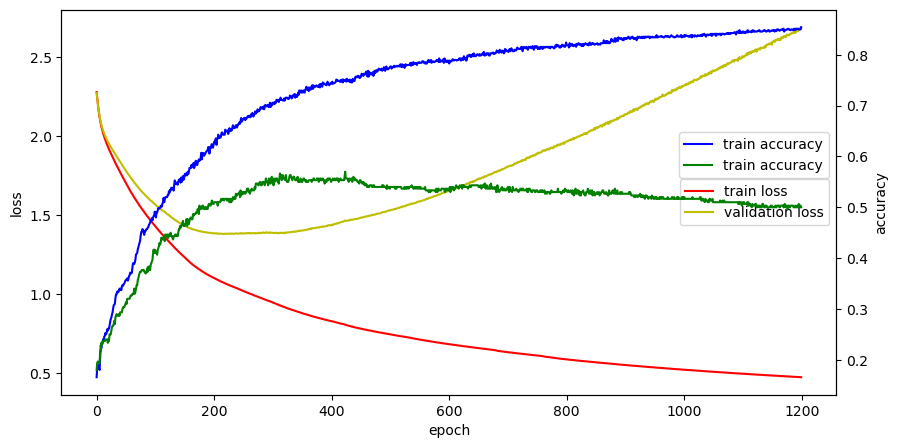

In [25]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='train accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

## ※ 콜백함수1

In [27]:
# 너무 자주 로그를 출력하면 지저분해질 수 있으니, 특정 에코크 간격마다 로그를 출력하도록 제한
import tensorflow.keras.callbacks as callbacks
class CustomHistory(callbacks.Callback): # on_epoch_end()는 각 에포크 종료시 자동 호출
    def __init__(self): # 생성자 함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if self.epoch%50 == 0:
            print('epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}'.
                 format(self.epoch,
                        logs.get('loss'),
                       logs.get('accuracy'),
                       logs.get('val_loss'),
                       logs.get('val_accuracy')))
#1 데이터셋 준비하기
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
X_train=X_train.reshape(50000, 784).astype('float32')/255.0
X_val=X_val.reshape(-1, 784).astype('float32')/255.0
X_test=X_test.reshape(-1, 784).astype('float32')/255.0

# 훈련셋(5만)과 검증셋(만) -> 700개, 300개만 random으로 choice
train_idxs = np.random.choice(50000, 700)
val_idxs = np.random.choice(10000, 300)

X_train = X_train[train_idxs]
Y_train = Y_train[train_idxs]
X_val = X_val[val_idxs]
Y_val = Y_val[val_idxs]

# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

# 2. 모델 구성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2,
               activation='relu'))
model.add(Dense(units=10,
               activation='softmax'))
# model.summary()

# 3. 학습 설정
model.compile(loss='categorical_crossentropy',
             optimizer='nadam',
             metrics=['accuracy'])
# 4. 모델 학습(콜백 적용)
customHistory = CustomHistory()
hist = model.fit(X_train, Y_train,
                epochs=1200,
                batch_size=100,
                validation_data=(X_val, Y_val),
                verbose=0,
                callbacks=[customHistory])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 1570      
                                                                 
 dense_5 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________
epoch:50, loss:1.6238263845443726, acc:0.43142858147621155, val_loss:1.6615110635757446, val_acc:0.40666666626930237
epoch:100, loss:1.36835515499115, acc:0.477142870426178, val_loss:1.4618664979934692, val_acc:0.4533333480358124
epoch:150, loss:1.2237491607666016, acc:0.5385714173316956, val_loss:1.368770718574524, val_acc:0.47333332896232605
epoch:200, loss:1.132950782775879, acc:0.5685714483261108, val_loss:1.3367202281951904, val_acc:0.4699

## ※콜백함수2 - Early Stopping(조기 종료)
- val_loss값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료

In [29]:
# 너무 자주 로그를 출력하면 지저분해질 수 있으니, 특정 에코크 간격마다 로그를 출력하도록 제한
import tensorflow.keras.callbacks as callbacks
class CustomHistory(callbacks.Callback): # on_epoch_end()는 각 에포크 종료시 자동 호출
    def __init__(self): # 생성자 함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if self.epoch%50 == 0:
            print('epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}'.\
                 format(self.epoch,
                        logs.get('loss'),
                       logs.get('accuracy'),
                       logs.get('val_loss'),
                       logs.get('val_accuracy')))


Epoch 1/1200
7/7 [==============================] - 1s 34ms/step - loss: 2.3092 - accuracy: 0.1057 - val_loss: 2.2951 - val_accuracy: 0.1400
Epoch 2/1200
7/7 [==============================] - 0s 14ms/step - loss: 2.2863 - accuracy: 0.1386 - val_loss: 2.2838 - val_accuracy: 0.1533
Epoch 3/1200
7/7 [==============================] - 0s 12ms/step - loss: 2.2680 - accuracy: 0.1543 - val_loss: 2.2721 - val_accuracy: 0.1633
Epoch 4/1200
7/7 [==============================] - 0s 11ms/step - loss: 2.2451 - accuracy: 0.1614 - val_loss: 2.2563 - val_accuracy: 0.1667
Epoch 5/1200
7/7 [==============================] - 0s 11ms/step - loss: 2.2230 - accuracy: 0.1357 - val_loss: 2.2371 - val_accuracy: 0.1767
Epoch 6/1200
7/7 [==============================] - 0s 10ms/step - loss: 2.2034 - accuracy: 0.1443 - val_loss: 2.2191 - val_accuracy: 0.1333
Epoch 7/1200
7/7 [==============================] - 0s 12ms/step - loss: 2.1855 - accuracy: 0.1386 - val_loss: 2.2018 - val_accuracy: 0.1433
Epoch 8/1200


Epoch 59/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.7315 - accuracy: 0.3443 - val_loss: 1.8003 - val_accuracy: 0.3233
Epoch 60/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.7271 - accuracy: 0.3443 - val_loss: 1.7983 - val_accuracy: 0.3300
Epoch 61/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.7223 - accuracy: 0.3500 - val_loss: 1.7952 - val_accuracy: 0.3267
Epoch 62/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.7182 - accuracy: 0.3529 - val_loss: 1.7934 - val_accuracy: 0.3300
Epoch 63/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.7134 - accuracy: 0.3600 - val_loss: 1.7895 - val_accuracy: 0.3300
Epoch 64/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.7091 - accuracy: 0.3586 - val_loss: 1.7875 - val_accuracy: 0.3300
Epoch 65/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.7051 - accuracy: 0.3586 - val_loss: 1.7857 - val_accuracy: 0.3333
Epoch 66

In [3]:
#1 데이터셋 준비하기
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
X_train=X_train.reshape(50000, 784).astype('float32')/255.0
X_val=X_val.reshape(-1, 784).astype('float32')/255.0
X_test=X_test.reshape(-1, 784).astype('float32')/255.0

# 훈련셋(5만)과 검증셋(만) -> 700개, 300개만 random으로 choice
train_idxs = np.random.choice(50000, 700)
val_idxs = np.random.choice(10000, 300)

X_train = X_train[train_idxs]
Y_train = Y_train[train_idxs]
X_val = X_val[val_idxs]
Y_val = Y_val[val_idxs]

# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

# 2. 모델 구성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2,
               activation='relu'))
model.add(Dense(units=10,
               activation='softmax'))
print(model.summary())

# 3. 학습 설정
model.compile(loss='categorical_crossentropy',
             optimizer='nadam',
             metrics=['accuracy'])
# 4. 모델 학습(콜백 적용)
from tensorflow.keras.callbacks import EarlyStopping
# earlyStopping = EarlyStopping(patience=30,# val_loss가 연달아 2번 이상 성능이 좋아지지 않으면 stop
#                              monitor='val_accuracy') # val_accuracy 가 연달아 2번이상 성능이 좋아지지 않으면 stop
#                                                      # Loss, accuracy, val_loss(기본값), val_accuracy
earlyStopping = EarlyStopping(patience=30)
hist = model.fit(X_train, Y_train,
                epochs=1200,
                batch_size=100,
                validation_data=(X_val, Y_val),
                callbacks=[earlyStopping])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1200
7/7 [==============================] - 1s 34ms/step - loss: 2.3200 - accuracy: 0.0643 - val_loss: 2.2910 - val_accuracy: 0.0933
Epoch 2/1200
7/7 [==============================] - 0s 10ms/step - loss: 2.2874 - accuracy: 0.0886 - val_loss: 2.2687 - val_accuracy: 0.1033
Epoch 3/1200
7/7 [==============================] - 0s 9ms/step - loss: 2.2677 - accuracy: 0.1186 - val_loss: 2.2494 - val_accuracy: 0.1167
Epoch 4/1200
7/7 [=====

7/7 [==============================] - 0s 9ms/step - loss: 1.5389 - accuracy: 0.4214 - val_loss: 1.6053 - val_accuracy: 0.3733
Epoch 55/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5311 - accuracy: 0.4229 - val_loss: 1.6004 - val_accuracy: 0.3767
Epoch 56/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5243 - accuracy: 0.4329 - val_loss: 1.5956 - val_accuracy: 0.3867
Epoch 57/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.5174 - accuracy: 0.4329 - val_loss: 1.5912 - val_accuracy: 0.3833
Epoch 58/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5109 - accuracy: 0.4300 - val_loss: 1.5863 - val_accuracy: 0.3900
Epoch 59/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5052 - accuracy: 0.4271 - val_loss: 1.5819 - val_accuracy: 0.3933
Epoch 60/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4983 - accuracy: 0.4343 - val_loss: 1.5774 - val_accuracy: 0.3933
Epoch 61/1200
7/7 [========

7/7 [==============================] - 0s 9ms/step - loss: 1.2579 - accuracy: 0.5886 - val_loss: 1.4194 - val_accuracy: 0.4867
Epoch 113/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.2541 - accuracy: 0.5943 - val_loss: 1.4174 - val_accuracy: 0.4933
Epoch 114/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.2503 - accuracy: 0.5986 - val_loss: 1.4153 - val_accuracy: 0.4967
Epoch 115/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.2472 - accuracy: 0.5986 - val_loss: 1.4132 - val_accuracy: 0.4933
Epoch 116/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.2430 - accuracy: 0.6043 - val_loss: 1.4112 - val_accuracy: 0.4967
Epoch 117/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.2399 - accuracy: 0.6029 - val_loss: 1.4094 - val_accuracy: 0.4933
Epoch 118/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.2355 - accuracy: 0.6029 - val_loss: 1.4075 - val_accuracy: 0.5000
Epoch 119/1200
7/7 [=

7/7 [==============================] - 0s 10ms/step - loss: 1.0854 - accuracy: 0.6529 - val_loss: 1.3528 - val_accuracy: 0.5300
Epoch 170/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.0825 - accuracy: 0.6514 - val_loss: 1.3535 - val_accuracy: 0.5333
Epoch 171/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.0803 - accuracy: 0.6557 - val_loss: 1.3528 - val_accuracy: 0.5333
Epoch 172/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.0778 - accuracy: 0.6557 - val_loss: 1.3513 - val_accuracy: 0.5333
Epoch 173/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.0759 - accuracy: 0.6543 - val_loss: 1.3514 - val_accuracy: 0.5300
Epoch 174/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.0732 - accuracy: 0.6557 - val_loss: 1.3506 - val_accuracy: 0.5333
Epoch 175/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.0703 - accuracy: 0.6557 - val_loss: 1.3506 - val_accuracy: 0.5267
Epoch 176/1200

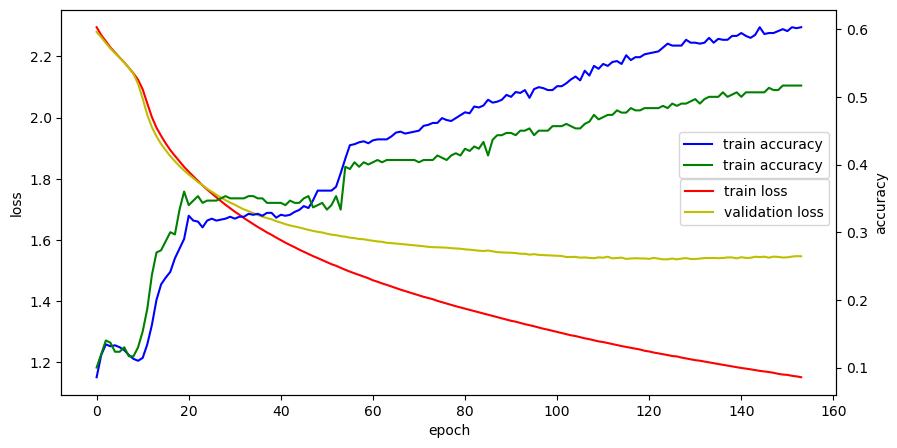

In [6]:
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='train accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

### 위 모델 (DNN)의 accuracy 늘리기
- 데이터 확보
- 레이어
- 활성화 함수 : 은닉층에는 주로 relu계열
- optimizer, epoch 등을 조정

In [9]:
# 너무 자주 로그를 출력하면 지저분해질 수 있으니, 특정 에코크 간격마다 로그를 출력하도록 제한
import tensorflow.keras.callbacks as callbacks
class CustomHistory(callbacks.Callback): # on_epoch_end()는 각 에포크 종료시 자동 호출
    def __init__(self): # 생성자 함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if self.epoch% 5 == 0:
            print('epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}'.\
                 format(self.epoch,
                        logs.get('loss'),
                       logs.get('accuracy'),
                       logs.get('val_loss'),
                       logs.get('val_accuracy')))

#1 데이터셋 준비하기
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
X_train=X_train.reshape(50000, 784).astype('float32')/255.0
X_val=X_val.reshape(-1, 784).astype('float32')/255.0
X_test=X_test.reshape(-1, 784).astype('float32')/255.0

# # 훈련셋(5만)과 검증셋(만) -> 700개, 300개만 random으로 choice
# train_idxs = np.random.choice(50000, 700)
# val_idxs = np.random.choice(10000, 300)
# X_train = X_train[train_idxs]
# Y_train = Y_train[train_idxs]
# X_val = X_val[val_idxs]
# Y_val = Y_val[val_idxs]

# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

# 2. 모델 구성
model = Sequential()
model.add(Input(shape=(784,)))
# model.add(Dense(units=512,
#                activation='relu'))
model.add(Dense(units=64,
               activation='relu'))
model.add(Dense(units=16,
               activation='relu'))
model.add(Dense(units=10,
               activation='softmax'))
print(model.summary())

# 3. 학습 설정
model.compile(loss='categorical_crossentropy',
             optimizer='nadam',
             metrics=['accuracy'])
# 4. 모델 학습(콜백 적용)
from tensorflow.keras.callbacks import EarlyStopping
# earlyStopping = EarlyStopping(patience=30,# val_loss가 연달아 2번 이상 성능이 좋아지지 않으면 stop
#                              monitor='val_accuracy') # val_accuracy 가 연달아 2번이상 성능이 좋아지지 않으면 stop
#                                                      # Loss, accuracy, val_loss(기본값), val_accuracy
earlyStopping = EarlyStopping(patience=10)
customHistory = CustomHistory()
hist = model.fit(X_train, Y_train,
                epochs=100,
                batch_size=100,
                validation_data=(X_val, Y_val),
                callbacks=[earlyStopping, customHistory],
                verbose=0)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                50240     
                                                                 
 dense_20 (Dense)            (None, 16)                1040      
                                                                 
 dense_21 (Dense)            (None, 10)                170       
                                                                 
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________
None
epoch:5, loss:0.10381532460451126, acc:0.9695199728012085, val_loss:0.11876574903726578, val_acc:0.9664000272750854
epoch:10, loss:0.05248380824923515, acc:0.9844800233840942, val_loss:0.10623276233673096, val_acc:0.9713000059127808
epoch:15, loss:0.0293916966766119, acc:0.9915000200271606, val_loss:0.110676

## 5. 모델 평가 ( 그래프, 평가함수)

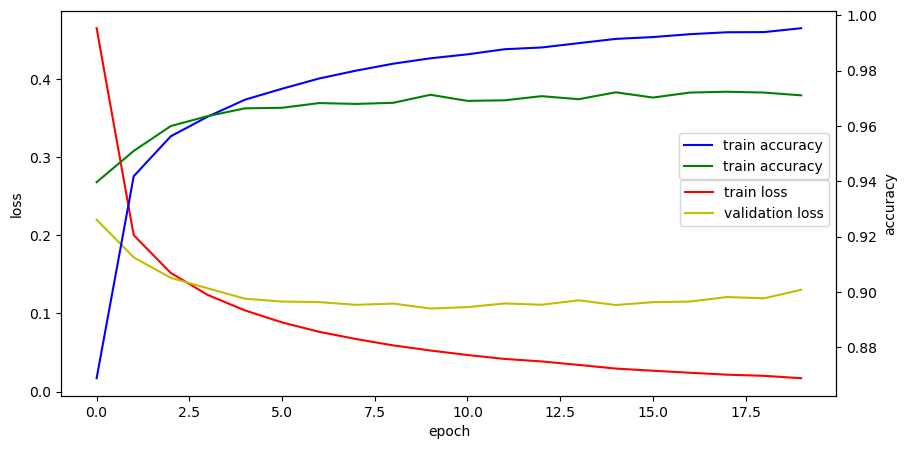

In [11]:
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='train accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [12]:
# 모델 평가
loss_and_metrics = model.evaluate(X_test, Y_test,
                                 batch_size=100)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

100/100 [==============================] - 0s 3ms/step - loss: 0.1265 - accuracy: 0.9694
loss : 0.12648428976535797
accuracy : 0.9693999886512756


## 6. 모델 저장
- 1. 학습된 모델 저장 : h5파일 (모델 로드시 추가 학습이 필요x)
- 2. 모델 구성만 저장 : json파일 (모델 로드시 추가 학습이 필요o)

In [15]:
# 학습된 모델 저장
model.save('model/mnist.h5')

In [16]:
# 학습된 모델 로드하기
from tensorflow.keras.models import load_model
model2 = load_model('model/mnist.h5')
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                50240     
                                                                 
 dense_20 (Dense)            (None, 16)                1040      
                                                                 
 dense_21 (Dense)            (None, 10)                170       
                                                                 
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________


In [17]:
model2.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1265 - accuracy: 0.9694


[0.12648428976535797, 0.9693999886512756]

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


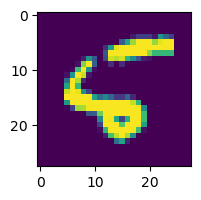

In [26]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[8].reshape(28,28))
print(Y_test[8])
print(Y_test[8].argmax())
plt.show()

In [27]:
# 모델 사용하기
X_test[0].shape

(784,)

In [34]:
result = model2.predict(X_test[0].reshape(1,784))
print('실제값 (원핫인코딩):', Y_test[0])
print('실제값 :', Y_test[0].argmax())
print('예측값 (원핫인코딩):', [round(r, 7)for r in result[0]])
print('예측값 :', result[0].argmax())

1/1 [==============================] - 0s 36ms/step
실제값 (원핫인코딩): [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
실제값 : 7
예측값 (원핫인코딩): [0.0, 0.0, 3e-07, 1.4e-06, 0.0, 0.0, 0.0, 0.9999982, 0.0, 0.0]
예측값 : 7


In [36]:
# 2. 모델의 구조만 저장
model_json = model.to_json()
with open('model/mnist.json', 'w')as f:
    f.write(model_json)

In [37]:
# 저장된 모델 구성 가져오기
with open('model/mnist.json', 'r') as f:
    model_json2 = f.read()

In [39]:
from tensorflow.keras.models import model_from_json
model3 = model_from_json(model_json2)
model3.summary() # 학습전 모델

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                50240     
                                                                 
 dense_20 (Dense)            (None, 16)                1040      
                                                                 
 dense_21 (Dense)            (None, 10)                170       
                                                                 
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________


In [43]:
model3.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
model3.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3050 - accuracy: 0.1085


[2.3050038814544678, 0.10849999636411667]

In [44]:
model3.fit(X_train, Y_train, epochs=100, batch_size=500, validation_data=[X_val, Y_val], callbacks=[earlyStopping])

Epoch 1/100
100/100 [==============================] - 1s 7ms/step - loss: 0.8895 - accuracy: 0.7543 - val_loss: 0.3405 - val_accuracy: 0.9111
Epoch 2/100
100/100 [==============================] - 1s 7ms/step - loss: 0.3112 - accuracy: 0.9129 - val_loss: 0.2478 - val_accuracy: 0.9299
Epoch 3/100
100/100 [==============================] - 1s 6ms/step - loss: 0.2427 - accuracy: 0.9309 - val_loss: 0.2082 - val_accuracy: 0.9405
Epoch 4/100
100/100 [==============================] - 1s 6ms/step - loss: 0.2059 - accuracy: 0.9405 - val_loss: 0.1857 - val_accuracy: 0.9471
Epoch 5/100
100/100 [==============================] - 1s 6ms/step - loss: 0.1789 - accuracy: 0.9476 - val_loss: 0.1663 - val_accuracy: 0.9533
Epoch 6/100
100/100 [==============================] - 1s 7ms/step - loss: 0.1578 - accuracy: 0.9550 - val_loss: 0.1570 - val_accuracy: 0.9547
Epoch 7/100
100/100 [==============================] - 1s 7ms/step - loss: 0.1420 - accuracy: 0.9594 - val_loss: 0.1430 - val_accuracy: 0.9596

In [45]:
model3.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1038 - accuracy: 0.9718


[0.10379093140363693, 0.9718000292778015]

In [48]:
#1 데이터셋 준비하기
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
X_train=X_train.reshape(50000, 784).astype('float32')/255.0
X_val=X_val.reshape(-1, 784).astype('float32')/255.0
X_test=X_test.reshape(-1, 784).astype('float32')/255.0

# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)
model = load_model('model/mnist.h5')

In [54]:
Y_test.argmax(axis=1) # 실제 값

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [57]:
Y_hat = model.predict(X_test).argmax(axis=1)
Y_hat.argmax()

313/313 [==============================] - 0s 2ms/step


7

In [59]:
ctab = pd.crosstab(Y_test.argmax(axis=1), Y_hat)
ctab.index.name='실제'
ctab.columns.name='예측'
ctab

예측,0,1,2,3,4,5,6,7,8,9
실제,,,,,,,,,,
0,967,0,0,1,3,0,3,3,3,0
1,0,1119,5,0,1,0,2,2,6,0
2,5,0,1001,6,5,0,4,5,5,1
3,1,0,7,985,0,1,0,6,7,3
4,2,0,5,1,945,0,3,4,4,18
5,3,0,1,16,1,849,7,3,10,2
6,6,2,3,1,3,4,938,0,1,0
7,2,3,14,4,3,0,0,992,3,7
8,5,0,12,8,1,2,2,7,934,3
